In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [2]:
def vector_cross_product_2d(v1, v2):
    """Compute the 2D scalar cross product of two vectors."""
    return v1[0] * v2[1] - v1[1] * v2[0]

def check_intersection(line1, line2):
    """Check if two lines on a circle intersect."""
    p1, p2 = line1
    p3, p4 = line2
    
    # Check if points from line2 lie on opposite sides of line1
    cross1 = vector_cross_product_2d(p2 - p1, p3 - p1)
    cross2 = vector_cross_product_2d(p2 - p1, p4 - p1)
    
    # Check if points from line1 lie on opposite sides of line2
    cross3 = vector_cross_product_2d(p4 - p3, p1 - p3)
    cross4 = vector_cross_product_2d(p4 - p3, p2 - p3)
    
    # If the signs of the cross products are different, the lines intersect
    return (cross1 * cross2 < 0) and (cross3 * cross4 < 0)

In [3]:
class GhostBuster:
    def __init__(self, ghostbuster_type, position="", ID=""):
        self.ghostbuster_type = ghostbuster_type  # Can be 'alien' or 'camper'
        self.position = position  # Initialized as empty
        self.ID = ID  # Initialized as empty

gb = GhostBuster("camper")
gb.__dict__

{'ghostbuster_type': 'camper', 'position': '', 'ID': ''}

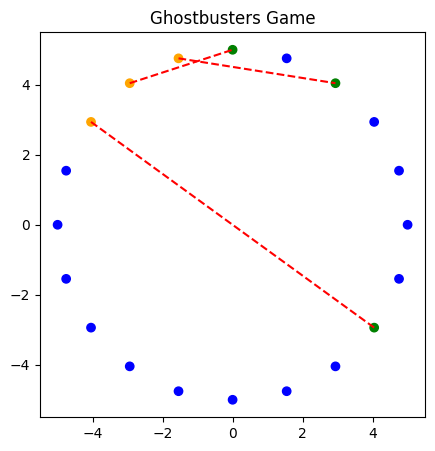

AT LEAST 2 PROTON BEAMS COLLIDED
FAIL


In [12]:
import random
import string
import matplotlib.pyplot as plt
import numpy as np

# GhostBuster class definition
class GhostBuster:
    def __init__(self, ghostbuster_type, position="", ID=""):
        self.ghostbuster_type = ghostbuster_type  # Can be 'camper' or 'alien'
        self.position = position  # Initialized as empty
        self.ID = ID  # Initialized as empty

# gb_game_state class definition (Base class)
class gb_game_state:
    def __init__(self, num_campers, num_pairs, game_type):
        # Check if num_campers is greater than 26
        if num_campers > 26:
            raise ValueError("num_campers must be 26 or less.")
        
        # Check if num_pairs is greater than half of num_campers
        if num_pairs > num_campers // 2:
            raise ValueError("num_pairs must be less than or equal to half of num_campers.")
        
        # Check if num_campers is even
        if num_campers % 2 != 0:
            raise ValueError("num_campers must be an even integer.")
        
        self.num_campers = num_campers  # Even integer
        self.num_pairs = num_pairs
        self.type = game_type  # Either "random" or "manual"
        self.game_ID = self.generate_game_id()  # Random string generated on init
        self.ghostbusters = []  # list containing all ghostbusters instances
        self.campers = []  # list containing all ghostbusters instances with type "camper"
        self.aliens = []  # list containing all ghostbusters instances with type "alien"
        self.camper_location_dict = {}
        self.game_letters = string.ascii_uppercase[:self.num_campers]
        self.target_dict = {}

    def generate_game_id(self):
        # Generate a random string of 8 characters for the game ID
        return ''.join(random.choices(string.ascii_uppercase + string.digits, k=8))
    
    def create_ghostbusters(self):
        letter_index = 0
        
        # Create one camper and one alien ghostbuster for each pair
        for _ in range(self.num_pairs):
            # Create one camper ghostbuster and assign an ID using letters
            camper_id = self.game_letters[letter_index]
            camper_ghostbuster = GhostBuster('camper', ID=camper_id)
            self.ghostbusters.append(camper_ghostbuster)
            self.campers.append(camper_ghostbuster)
            letter_index += 1

        for _ in range(self.num_pairs):    
            # Create one alien ghostbuster and assign an ID using letters
            alien_id = self.game_letters[letter_index]
            alien_ghostbuster = GhostBuster('alien', ID=alien_id)
            self.ghostbusters.append(alien_ghostbuster)
            self.aliens.append(alien_ghostbuster)
            letter_index += 1
    
    def set_ghostbuster_positions_rand(self):
        # Generate a list of unique random positions
        unique_positions = random.sample(range(self.num_campers), self.num_campers)
        
        # Assign positions to ghostbusters
        for i, ghostbuster in enumerate(self.ghostbusters):
            ghostbuster.position = unique_positions[i]

    def set_targets(self):

        for i in np.arange(0,self.num_pairs):
            self.target_dict[self.campers[i].ID] = self.aliens[i].ID
        
        return self.target_dict

# New gb_game_rep class using composition (holds an instance of gb_game_state)
class gb_game_rep:
    def __init__(self, game_state,verbose = False):
        # Store the game_state instance in the gb_game_rep class
        self.game_state = game_state

        # store verbosity
        self.verbose = verbose
        
        # Additional attribute for the representation of the game
        self.game_representation = {}

        # initialize list to contain line info
        self.line_list = []

        # initialize game result as success
        self.game_result = 'SUCCESS'

    def create_game_rep(self, aliens=[19, 5,6]):
        # Create a DataFrame to hold positions
        df = pd.DataFrame(np.arange(0, self.game_state.num_campers), columns=['POSITION'])
        df['ANGLES'] = np.linspace(0, 2 * np.pi, df.shape[0], endpoint=False)
        df['XPOS'] = 5 * np.cos(df['ANGLES'])
        df['YPOS'] = 5 * np.sin(df['ANGLES'])

        # bring in camper locations from game state
        campers = [c.position for c in self.game_state.campers]
        aliens = [a.position for a in self.game_state.aliens]

        # Initialize camper indicator
        df['CAMPER_IND'] = 0  # Use 0 as the default indicator
        df.loc[campers, 'CAMPER_IND'] = 1  # Set 1 for campers

        # Initialize alien indicator
        df['ALIEN_IND'] = 0  # Use 0 as the default indicator
        df.loc[aliens, 'ALIEN_IND'] = 1  # Set 1 for aliens

        # Assign colors based on indicators
        df['COLOR'] = 'blue'  # Default color
        df.loc[df['ALIEN_IND'] == 1, 'COLOR'] = 'green'  # Set color for aliens
        df.loc[df['CAMPER_IND'] == 1, 'COLOR'] = 'orange'  # Set color for campers

        # Create color list for plotting
        colors = df['COLOR'].tolist()

        # Create the scatter plot
        if self.verbose:
            plt.figure(figsize=(5, 5))
            plt.scatter(df['XPOS'], df['YPOS'], c=colors)  # Use the colors list
            plt.gca().set_aspect('equal', adjustable='box')
            plt.title(f'Ghostbusters Game')
            
        
        for p in np.arange(self.game_state.num_pairs):
            p1 = df.loc[campers[p]]
            p2 = df.loc[aliens[p]]

            self.line_list.append((np.array([p1['XPOS'],p1['YPOS']]),np.array([p2['XPOS'],p2['YPOS']])))
            if self.verbose:
                plt.plot([p1['XPOS'], p2['XPOS']], [p1['YPOS'], p2['YPOS']], color='red', linestyle='--')
        
        if self.verbose:
            plt.show()
        
        
    
    def check_result(self):
        print(check_intersection(self.line_list[0], self.line_list[1]))
        pass

    def evaluate_game(self):
        int_tests = []
        for pair in itertools.combinations(self.line_list, 2):
            int_tests.append(check_intersection(pair[0], pair[1]))
        if any(element is np.True_ for element in int_tests):
            self.game_result = "FAIL"
            if self.verbose:
                print('AT LEAST 2 PROTON BEAMS COLLIDED')
        else:
            self.game_result = "SUCCESS"
            if self.verbose:
                print("THE WORLD IS SAVED")

        

# Example usage
try:
    # Initialize gb_game_state
    game_state = gb_game_state(20, 3, "random")
    game_state.create_ghostbusters()
    game_state.set_ghostbuster_positions_rand()

    # Initialize gb_game_rep with game_state
    game_rep = gb_game_rep(game_state,verbose=True)

    # Create and display game representation
    game_rep.create_game_rep()
    game_rep.evaluate_game()
    print(game_rep.game_result)


    
except ValueError as e:
    print(e)


In [5]:
class game_simulator:
    def __init__(self, num_campers, num_pairs, num_trials):
        """Initialize the simulator with the number of campers, pairs, and trials."""
        self.num_campers = num_campers
        self.num_pairs = num_pairs
        self.num_trials = num_trials
        self.trial_results = []  # List to store the result of each trial
    
    def run_simulation(self):
        """Run the game simulation for the specified number of trials."""
        for trial in range(self.num_trials):
            # print(f"Running trial {trial + 1}...")
            
            # Initialize gb_game_state
            try:
                game_state = gb_game_state(self.num_campers, self.num_pairs, "random")
                game_state.create_ghostbusters()
                game_state.set_ghostbuster_positions_rand()

                # Initialize gb_game_rep with game_state
                game_rep = gb_game_rep(game_state)

                # Create and evaluate the game representation
                game_rep.create_game_rep()
                game_rep.evaluate_game()

                # Record the result of this trial
                self.trial_results.append(game_rep.game_result)

            except ValueError as e:
                print(f"Error in trial {trial + 1}: {e}")
                self.trial_results.append("ERROR")

    def report_results(self):
        """Print a summary of the simulation results, including failure percentage."""
        success_count = self.trial_results.count('SUCCESS')
        fail_count = self.trial_results.count('FAIL')
        error_count = self.trial_results.count('ERROR')

        total_valid_trials = success_count + fail_count  # Exclude errors
        failure_percentage = (fail_count / total_valid_trials) * 100 if total_valid_trials > 0 else 0

        print("\nSimulation Results Summary:")
        print(f"Total Trials: {self.num_trials}")
        print(f"Successful Trials: {success_count}")
        print(f"Failed Trials: {fail_count}")
        print(f"Errors: {error_count}")
        print(f"Failure Percentage: {failure_percentage:.2f}%")


In [11]:
# Create a game simulator with 26 campers, 2 pairs, and 10 trials
simulator = game_simulator(num_campers=20, num_pairs=3, num_trials=1000)

# Run the simulation
simulator.run_simulation()

# Report the results
simulator.report_results()



Simulation Results Summary:
Total Trials: 1000
Successful Trials: 316
Failed Trials: 684
Errors: 0
Failure Percentage: 68.40%


### Next Steps
- end product: an app that visualizes game and records results to database